# Data Analysis and Visualisation &mdash; Lab 02

In [1]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams.update({
    "font.size": 12,
})

## Problem 1

In [2]:
import pandas as pd

statcounter_ww = pd.read_csv("../data/linux-adoption/StatCounter_Worldwide.csv", parse_dates=["Date"])
statcounter_vn = pd.read_csv("../data/linux-adoption/StatCounter_Viet+Nam.csv", parse_dates=["Date"])

In [3]:
statcounter_ww.info()
statcounter_ww.drop(columns="Date").describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       34 non-null     datetime64[ns]
 1   Windows    34 non-null     float64       
 2   OS X       34 non-null     float64       
 3   Unknown    34 non-null     float64       
 4   Linux      34 non-null     float64       
 5   Chrome OS  34 non-null     float64       
 6   macOS      34 non-null     float64       
 7   Other      34 non-null     float64       
 8   Region     34 non-null     object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.5+ KB


,Windows,OS X,Unknown,Linux,Chrome OS,macOS,Other
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,70.720882,15.335882,6.796176,3.651176,2.396176,1.092647,0.007647
std,2.846059,3.561124,2.706091,0.559939,0.879979,2.066862,0.004306
min,62.060000,8.330000,3.030000,2.700000,1.020000,0.000000,0.000000
25%,69.405000,14.290000,4.712500,3.082500,1.815000,0.000000,0.010000
50%,71.570000,15.400000,6.330000,3.820000,2.245000,0.000000,0.010000
75%,72.787500,17.002500,7.865000,4.050000,3.147500,0.000000,0.010000
max,74.140000,21.320000,13.000000,4.550000,4.130000,5.580000,0.010000


In [25]:
statcounter_ww.head()

,Date,Windows,OS X,Unknown,Linux,Chrome OS,macOS,Other,Region
0,2023-01-01,74.14,15.33,5.27,2.91,2.35,0.0,0.01,Worldwide
1,2023-02-01,71.78,16.26,6.12,2.94,2.90,0.0,0.01,Worldwide
2,2023-03-01,69.40,17.21,7.30,2.85,3.23,0.0,0.01,Worldwide
3,2023-04-01,62.65,17.79,13.00,2.83,3.72,0.0,0.01,Worldwide
4,2023-05-01,62.06,18.96,12.69,2.70,3.59,0.0,0.01,Worldwide


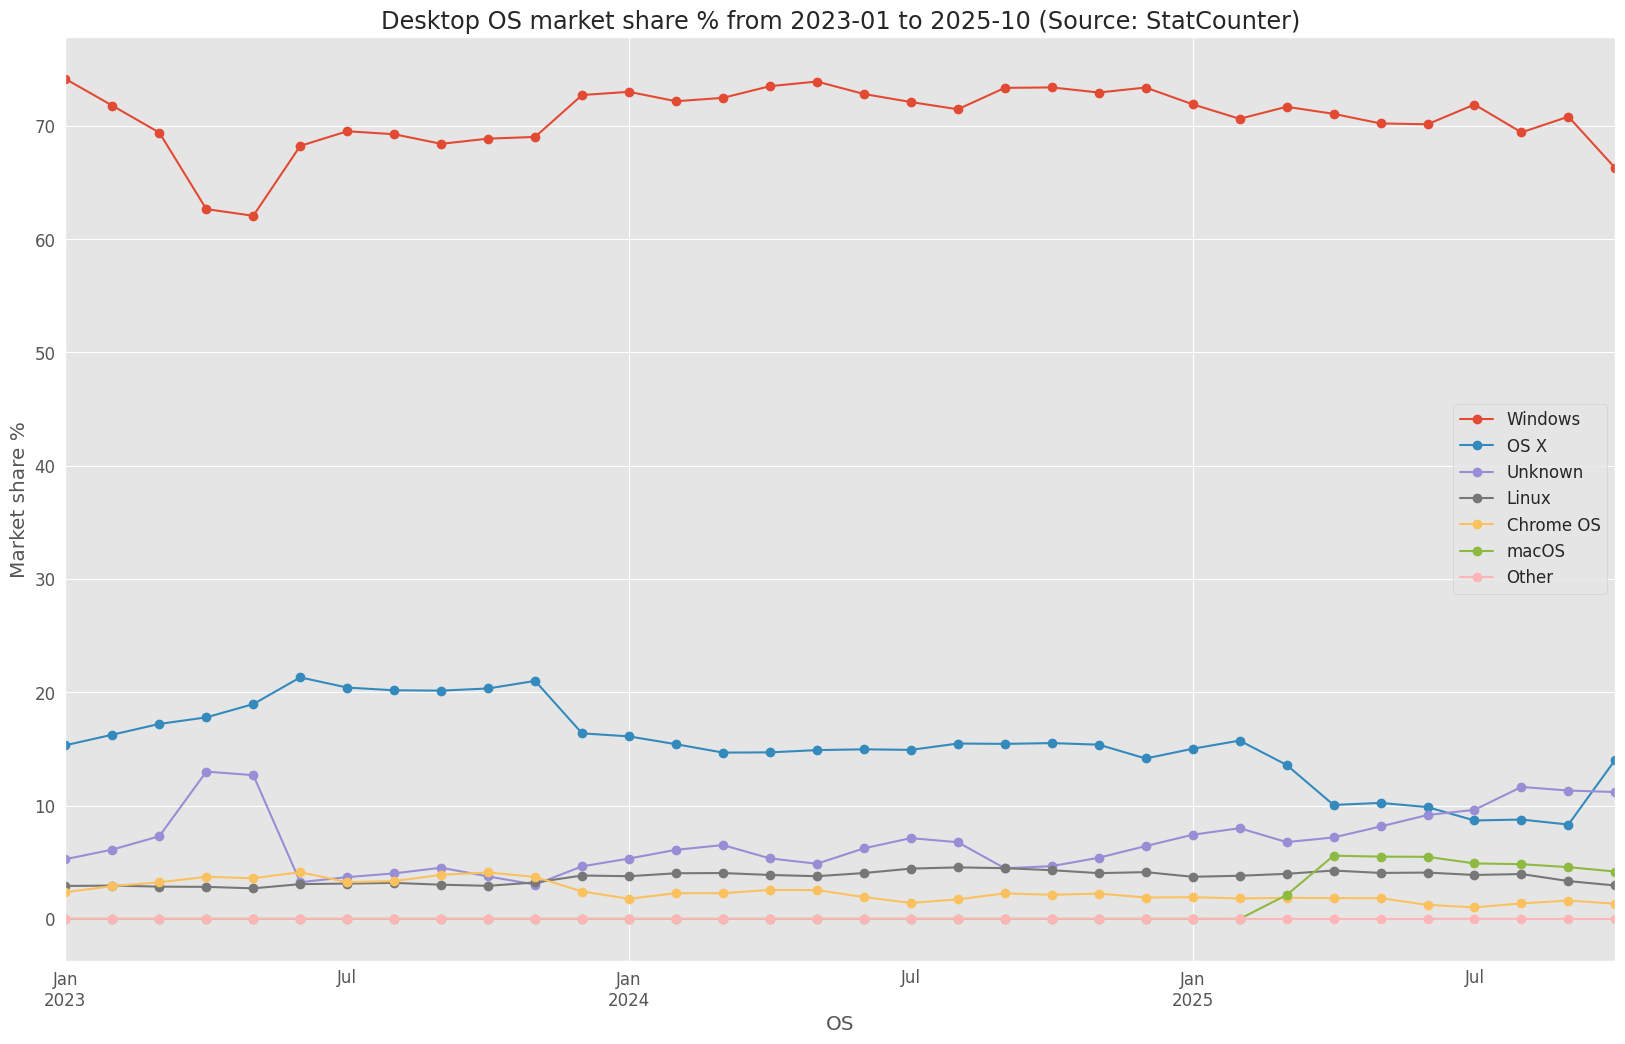

In [34]:
statcounter_ww.plot.line(x="Date", marker="o", figsize=(20, 12))

plt.title("Desktop OS market share % from 2023-01 to 2025-10 (Source: StatCounter)")

plt.xlabel("OS")
plt.ylabel("Market share %")

plt.show()

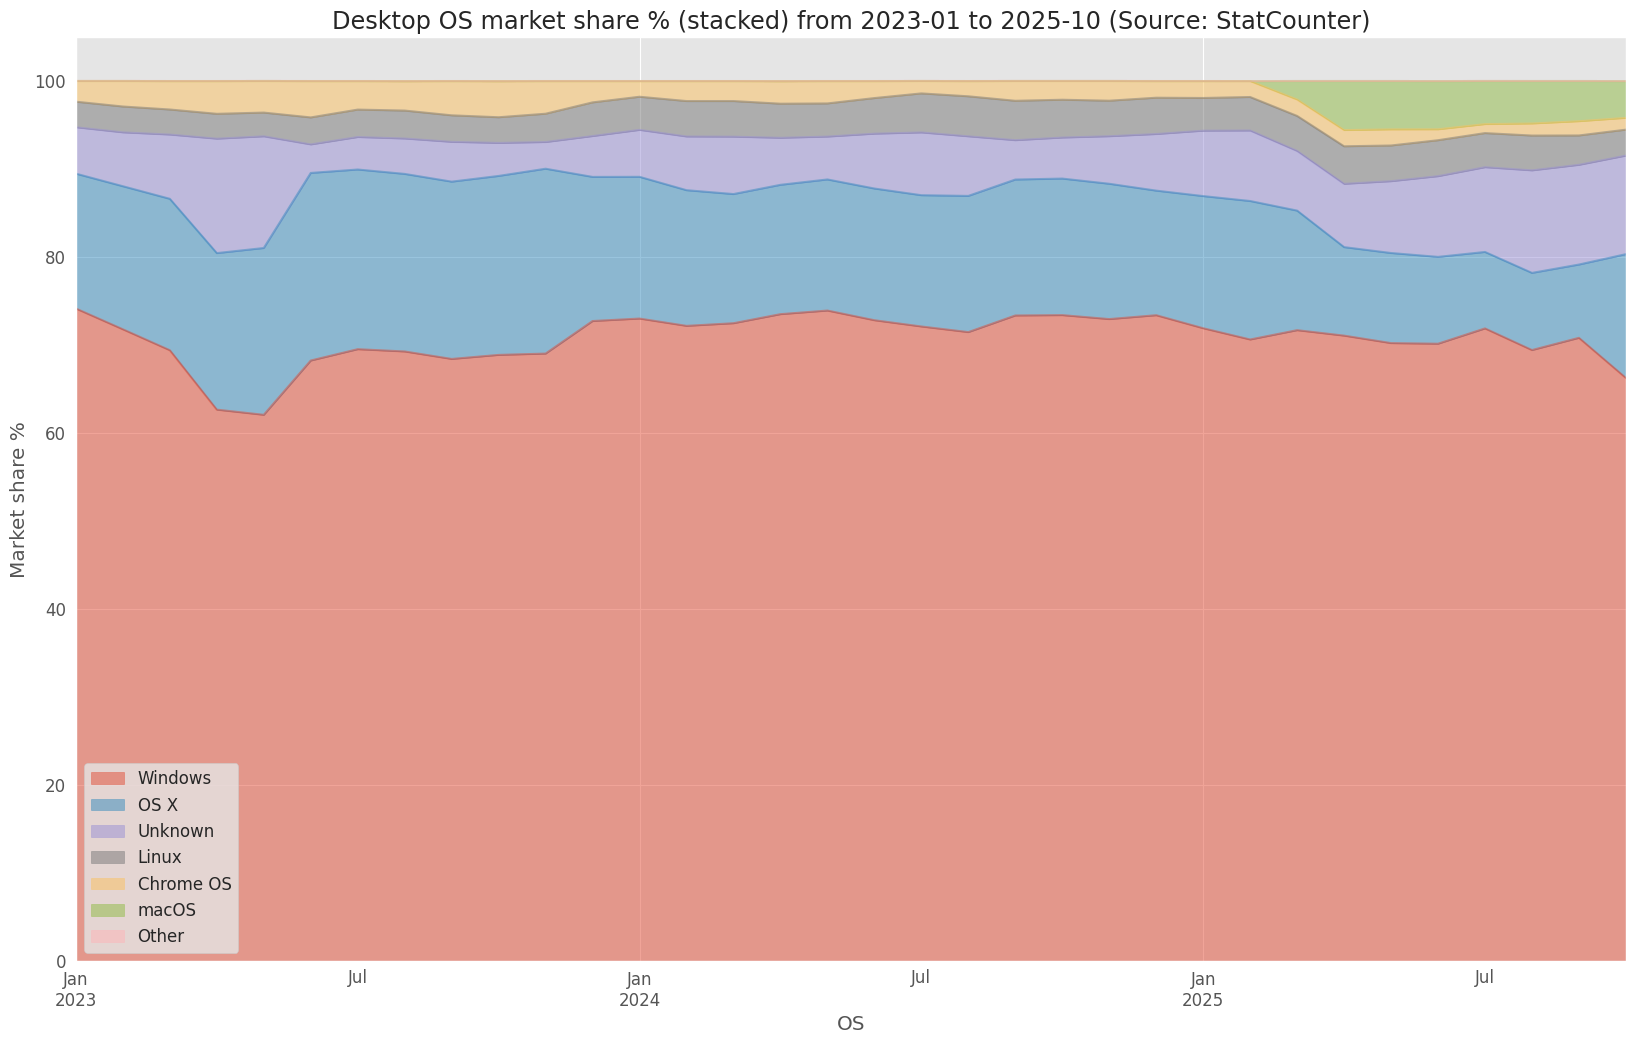

In [66]:
statcounter_ww.plot.area(x="Date", figsize=(20, 12), alpha=0.5)

plt.title("Desktop OS market share % (stacked) from 2023-01 to 2025-10 (Source: StatCounter)")

plt.xlabel("OS")
plt.ylabel("Market share %")

plt.show()

In [46]:
distrowatch_phr = pd.read_csv("../data/linux-adoption/DistroWatch_HPD.csv")

distrowatch_phr.info()
distrowatch_phr["hits_per_day"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ranking       1560 non-null   int64 
 1   distro        1560 non-null   object
 2   hits_per_day  1560 non-null   int64 
 3   month_range   1560 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 48.9+ KB


count    1560.000000
mean      158.769231
std       337.307553
min         3.000000
25%        38.000000
50%        64.000000
75%       158.250000
max      4876.000000
Name: hits_per_day, dtype: float64

In [58]:
distrowatch_phr[distrowatch_phr["month_range"] == 1].head()

,ranking,distro,hits_per_day,month_range
1170,1,CachyOS,4876,1
1171,2,Mint,2945,1
1172,3,MX Linux,2379,1
1173,4,Zorin,1705,1
1174,5,Debian,1616,1


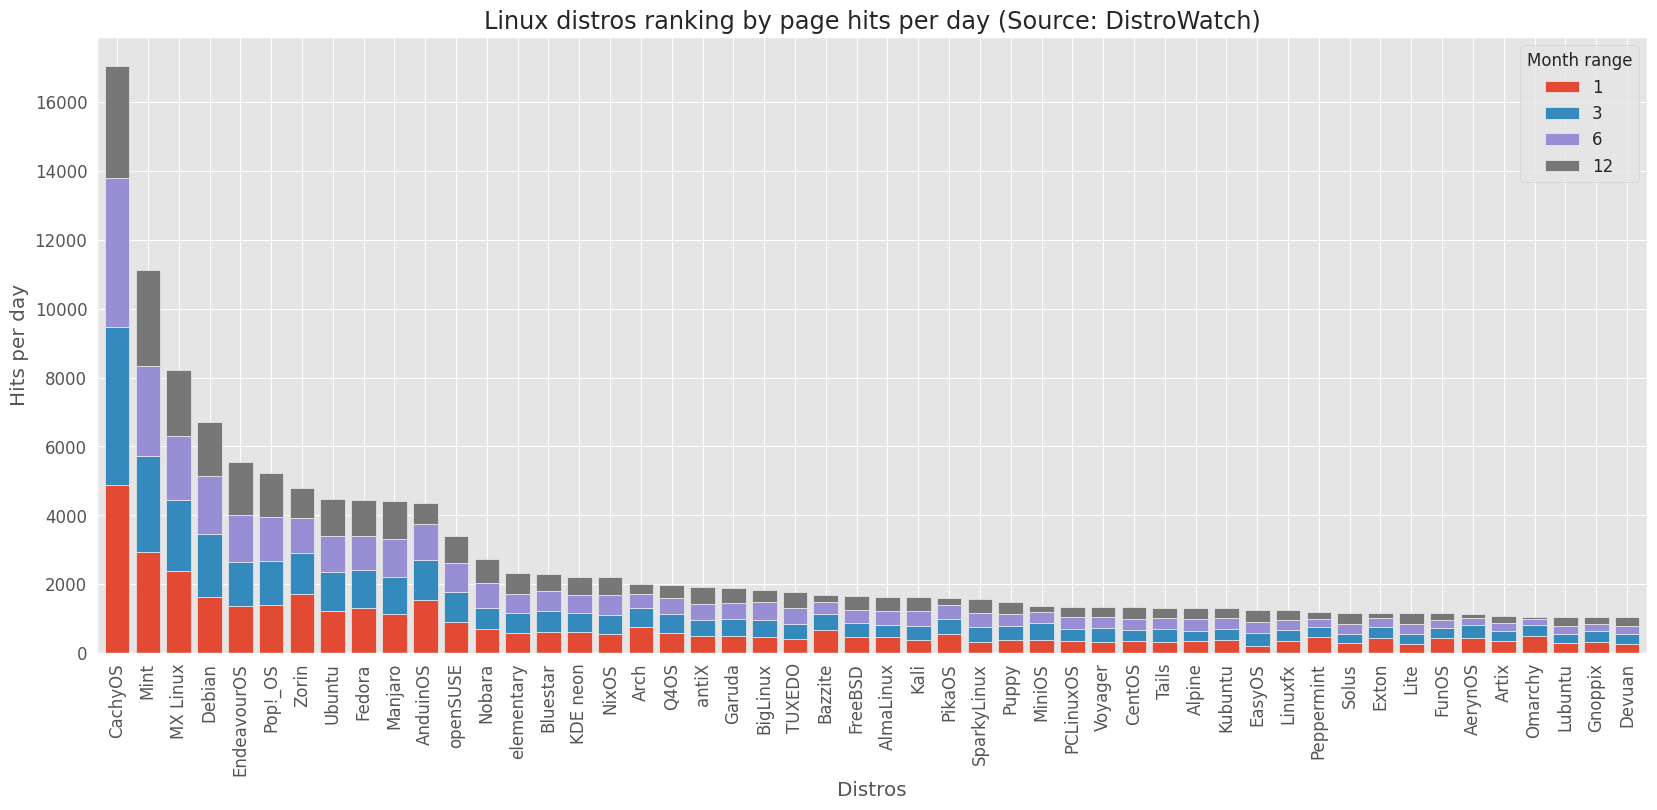

In [150]:
distrowatch_phr \
    .pivot_table(
        index="distro",
        columns="month_range",
        values="hits_per_day",
        aggfunc="sum",
    ).reset_index() \
    .assign(avg_hpd=lambda d: d.drop(columns="distro").mean(axis=1)) \
    .sort_values("avg_hpd", ascending=False).drop(columns="avg_hpd").set_index("distro").head(50) \
    .plot.bar(stacked=True, width=0.8, figsize=(20, 8))

plt.title("Linux distros ranking by page hits per day (Source: DistroWatch)")

plt.xlabel("Distros")
plt.ylabel("Hits per day")

plt.legend(title="Month range")

plt.show()